# Projet Big Data


Importation du dataset Landscapes

In [ ]:
!wget https://github.com/ml5js/ml5-data-and-models/raw/master/datasets/images/landscapes/landscapes_small.zip
!mkdir landscapes
!unzip landscapes_small.zip -d landscapes
!rm -r landscapes/__MACOSX

--2025-01-25 15:28:02--  https://github.com/ml5js/ml5-data-and-models/raw/master/datasets/images/landscapes/landscapes_small.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ml5js/ml5-data-and-models/master/datasets/images/landscapes/landscapes_small.zip [following]
--2025-01-25 15:28:03--  https://raw.githubusercontent.com/ml5js/ml5-data-and-models/master/datasets/images/landscapes/landscapes_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81935123 (78M) [application/zip]
Saving to: ‘landscapes_small.zip’

landscapes_small.zi 100%[===================>]  78.14M   189MB/s    in 0.4s 

# 1. Séparer vos données en 2 : un jeu d’apprentissage 80% et un jeu de validation 20%

Importation des Bibliothèque nécessaire

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, BatchNormalization,Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
import pandas as pd
import time
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

On met en place notre jeu de données

In [ ]:
# Chemin vers le répertoire contenant les images
input_dir = 'landscapes'

datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(224, 224),   # Résolution réduite pour que l'algo tourne plus vite
    batch_size=32,            # Augmentation de la taille des batchs
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)



Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


Regardons les classes qu'on a :

In [ ]:
# Afficher les classes détectées par ImageDataGenerator
print("Classes détectées :")
for class_name, class_index in train_generator.class_indices.items():
    print(f"{class_index}: {class_name}")


Classes détectées :
0: city
1: field
2: forest
3: lake
4: mountain
5: ocean
6: road


Forme des données d'entraînement :
X_train: (3026, 224, 224, 3), y_train: (3026, 7)


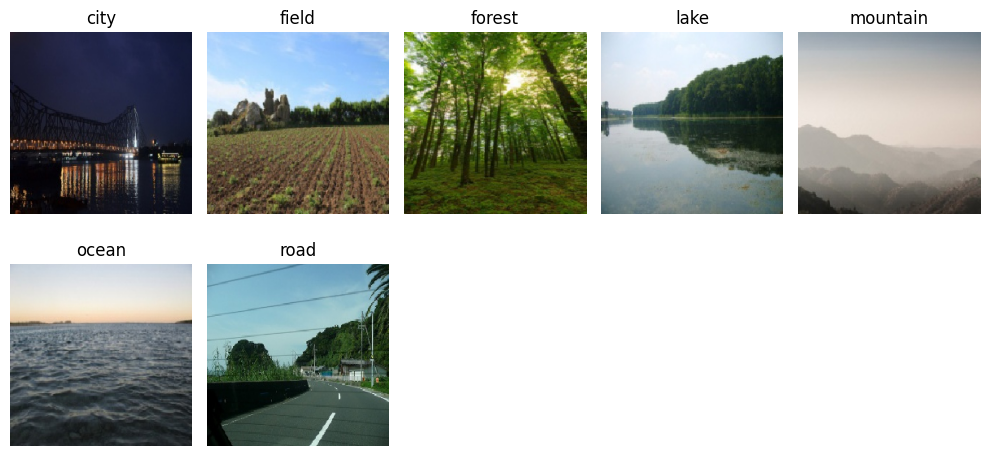

In [ ]:
X_train, y_train = [], []

# Parcourir tous les lots du générateur
for _ in range(len(train_generator)):
    x_batch, y_batch = next(train_generator)  # Utiliser `next` pour obtenir un lot
    X_train.append(x_batch)
    y_train.append(y_batch)

# Convertir en tableaux NumPy pour manipulation
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

print("Forme des données d'entraînement :")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

# Obtenir les noms des classes
CLASS_NAME = []
for class_name, class_index in train_generator.class_indices.items():
    CLASS_NAME.append(class_name)

# Visualisation des exemples
fig = plt.figure(figsize=(10, 5))
for i in range(len(CLASS_NAME)):  # Parcourir toutes les classes
    plt.subplot(2, 5, i + 1)

    # Trouver l'indice de la première occurrence de la classe i
    idx = np.where(np.argmax(y_train, axis=1) == i)[0][0]
    image = X_train[idx]

    # Vérifier les dimensions et afficher correctement l'image
    if image.shape[-1] == 3:  # Si c'est une image RGB
        plt.imshow(image)
    else:  # Sinon, afficher comme une image en niveaux de gris
        plt.imshow(image[:, :, 0], cmap='gray')

    plt.title(CLASS_NAME[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


# 2. Entraîner un réseau de convolutions que vous aurez défini vous même

In [ ]:
# Modèle simple
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),  # Réduction du nombre de neurones
    Dense(train_generator.num_classes, activation='softmax')
])


# Compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entraînement rapide
history = model.fit(
    train_generator,
    epochs=10,                 # Réduction du nombre d'époques
    validation_data=validation_generator
)

# Évaluation
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.1851 - loss: 3.8880 - val_accuracy: 0.2212 - val_loss: 1.8828
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.2519 - loss: 1.8218 - val_accuracy: 0.4238 - val_loss: 1.5720
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.4134 - loss: 1.5417 - val_accuracy: 0.4503 - val_loss: 1.4972
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.4370 - loss: 1.4424 - val_accuracy: 0.4331 - val_loss: 1.4390
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4628 - loss: 1.3646 - val_accuracy: 0.4106 - val_loss: 1.4409
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.4866 - loss: 1.3052 - val_accuracy: 0.4993 - val_loss: 1.3356
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5113 - loss: 1.2111 - val_accuracy: 0.4954 - val_loss: 1.3159
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5467 - loss: 1.1401 - val_accuracy: 0.4954 - val_loss:

On trace nos courbe d'apprentissage

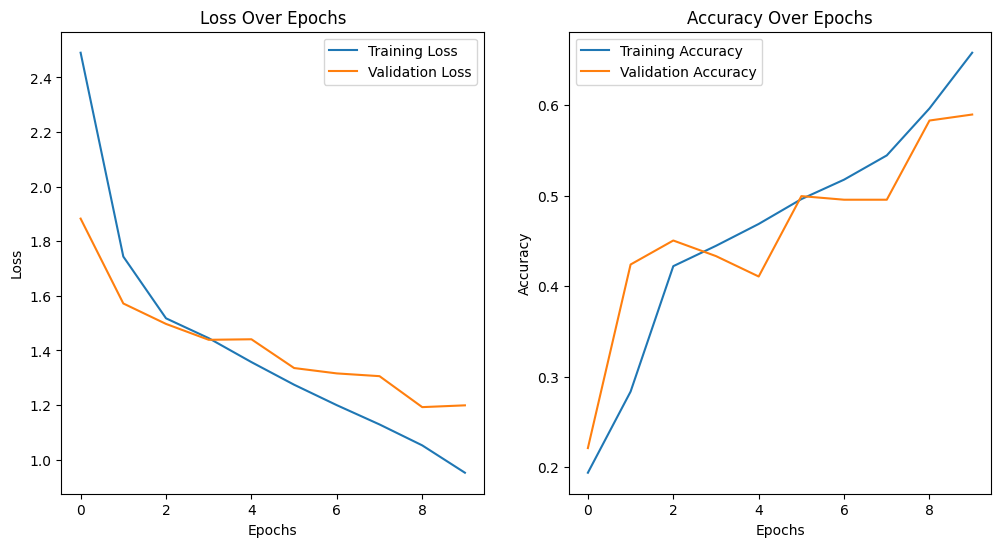

In [ ]:
#Fonction pour tracer les courbes d'apprentissage
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))

    # Courbe de la perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Courbe de la précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Trace les courbes d'apprentissage
plot_learning_curves(history)

In [ ]:
class_names = ['city', 'field', 'forest', 'lake', 'mountain', 'ocean', 'road']

# Fonction pour prédire la classe d'une image
def predict_image_class(img_path, model, class_names):
    # Charger l'image
    img = image.load_img(img_path, target_size=(224, 224))

    # Convertir l'image en tableau numpy
    img_array = image.img_to_array(img)

    # Ajouter une dimension pour correspondre à la forme d'entrée du modèle
    img_array = np.expand_dims(img_array, axis=0)

    # Normaliser l'image (en utilisant la même normalisation que pour l'entraînement)
    img_array = img_array / 255.0

    # Prédiction
    predictions = model.predict(img_array)

    # Trouver la classe prédite
    predicted_class_idx = np.argmax(predictions)
    predicted_class = class_names[predicted_class_idx]

    # Afficher l'image et la classe prédite
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()


Classe réelle : city
Image sélectionnée : 8158295598_3802c12ecf.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


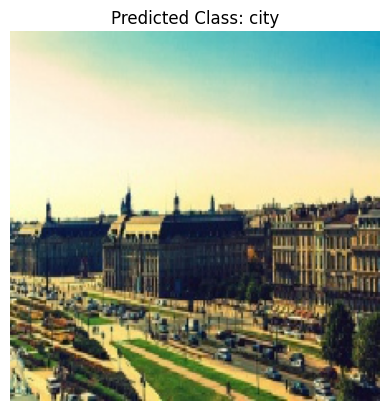

--------------------------------------------------
Classe réelle : ocean
Image sélectionnée : 2961644864_3623de69e2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


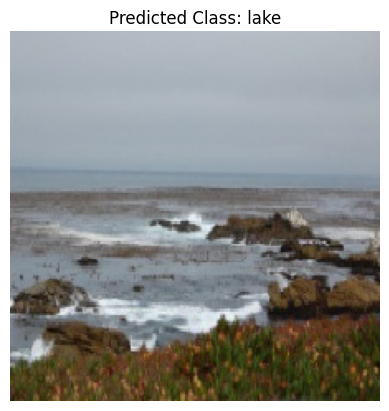

--------------------------------------------------
Classe réelle : road
Image sélectionnée : 204143040_cbec7a36a5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


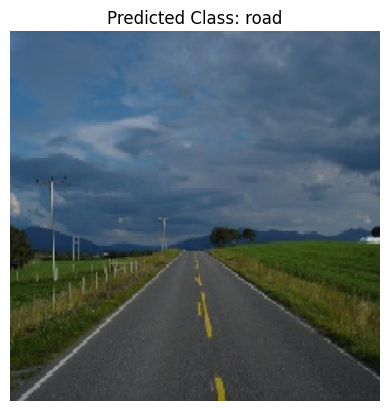

--------------------------------------------------
Classe réelle : mountain
Image sélectionnée : 23782658638_2bdf31eee2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


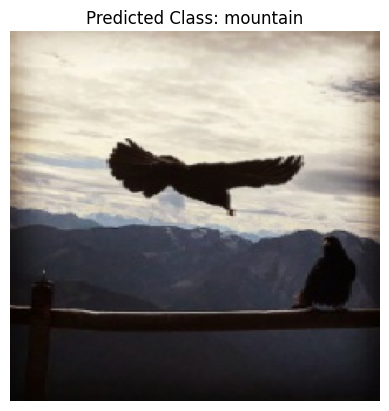

--------------------------------------------------
Classe réelle : field
Image sélectionnée : 2909031299_f89118de09.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


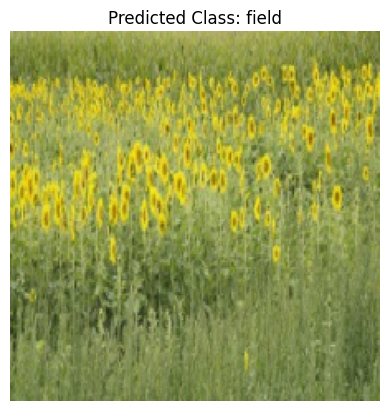

--------------------------------------------------


In [ ]:
def predict_n_random_images(input_dir, model, class_names, n=5):
    # Liste des classes disponibles
    classes = os.listdir(input_dir)

    for _ in range(n):
        # Sélectionner une classe aléatoire
        random_class = random.choice(classes)

        # Liste des images dans le répertoire de la classe choisie
        class_images = os.listdir(os.path.join(input_dir, random_class))

        # Sélectionner une image aléatoire dans cette classe
        random_image = random.choice(class_images)

        # Construire le chemin complet de l'image
        img_path = os.path.join(input_dir, random_class, random_image)

        # Afficher des informations sur l'image sélectionnée
        print(f"Classe réelle : {random_class}")
        print(f"Image sélectionnée : {random_image}")

        # Prédire la classe de l'image
        predict_image_class(img_path, model, class_names)
        print("-" * 50)  # Pour séparer les prédictions

# Exemple d'appel avec 5 images aléatoires
predict_n_random_images('landscapes', model, class_names, n=5)


# 3. Utiliser de manière individuelle différentes techniques permettant d’augmenter la capacité de généralisation afin d’améliorer votre modèle (data-augmentation, dropout, etc...)

In [ ]:
datagen_augmented = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,        # Rotation des images
    width_shift_range=0.2,    # Translation horizontale
    height_shift_range=0.2,   # Translation verticale
    shear_range=0.2,          # Transformation en cisaillement
    zoom_range=0.2,           # Zoom
    horizontal_flip=True,     # Flip horizontal
    fill_mode='nearest',      # Remplissage des pixels vides
    validation_split=0.2
)

train_generator_augmented = datagen_augmented.flow_from_directory(
    input_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator_augmented = datagen_augmented.flow_from_directory(
    input_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


In [ ]:
# Modèle avec data-augmentation
model_augmented = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),  # Réduction du nombre de neurones
    Dense(train_generator.num_classes, activation='softmax')
])

# Compilation
model_augmented.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Réutiliser le modèle complexe pour l'entraînement avec ces générateurs (avec le meme reseaux de neuronne qu'en haut)
history_augmented =  model_augmented.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=validation_generator_augmented
)

# Évaluation
loss, accuracy = model.evaluate(validation_generator_augmented)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 428ms/step - accuracy: 0.2672 - loss: 4.0219 - val_accuracy: 0.4212 - val_loss: 1.4399
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 80s 412ms/step - accuracy: 0.4555 - loss: 1.4219 - val_accuracy: 0.4808 - val_loss: 1.4013
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.5499 - loss: 1.2408 - val_accuracy: 0.5960 - val_loss: 1.0956
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 82s 411ms/step - accuracy: 0.5468 - loss: 1.1688 - val_accuracy: 0.6040 - val_loss: 1.1158
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - accuracy: 0.5741 - loss: 1.1500 - val_accuracy: 0.5934 - val_loss: 1.0574
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 85s 445ms/step - accuracy: 0.6029 - loss: 1.0771 - val_accuracy: 0.6079 - val_loss: 1.1317
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 79s 416ms/step - accuracy: 0.5679 - loss: 1.1120 - val_accuracy: 0.6079 - val_loss: 1.0539
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 83s 416ms/step - accuracy: 0.6426 - loss: 0.9923 - val_accuracy: 0.651

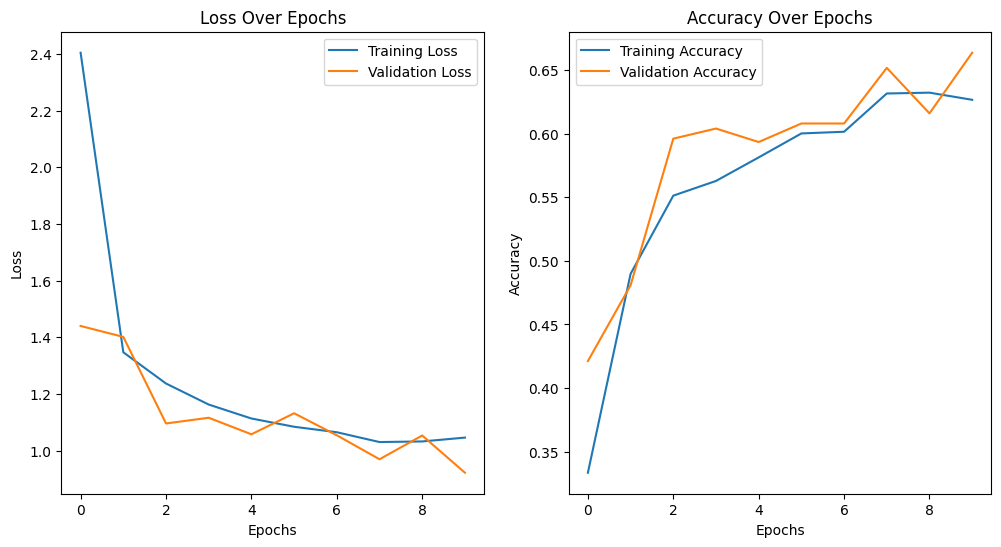

In [ ]:
# Trace les courbes d'apprentissage
plot_learning_curves(history_augmented)

In [ ]:
# Modèle plus complexe

complex_model = Sequential()
complex_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
complex_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
complex_model.add(MaxPooling2D(pool_size=(2, 2)))
complex_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
complex_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
complex_model.add(MaxPooling2D(pool_size=(2, 2)))
complex_model.add(Flatten())
complex_model.add(Dense(512, activation='relu'))
complex_model.add(Dropout(0.2))
complex_model.add(Dense(7, activation='softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-6)

complex_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Entraînement
history_complex = complex_model.fit(
    train_generator_augmented,          # On conbine différent methode (data-augmentation, dropout)
    epochs=10,
    validation_data=validation_generator_augmented
)

# Évaluation
loss_complex, accuracy_complex = complex_model.evaluate(validation_generator)
print(f"Complex Model - Loss: {loss_complex:.4f}, Accuracy: {accuracy_complex:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 81s 689ms/step - accuracy: 0.3317 - loss: 1.7628 - val_accuracy: 0.4570 - val_loss: 1.3392
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 46s 466ms/step - accuracy: 0.5064 - loss: 1.3061 - val_accuracy: 0.5815 - val_loss: 1.1694
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 450ms/step - accuracy: 0.5706 - loss: 1.1508 - val_accuracy: 0.5775 - val_loss: 1.1300
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 83s 450ms/step - accuracy: 0.5943 - loss: 1.1000 - val_accuracy: 0.6000 - val_loss: 1.0513
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.6144 - loss: 1.0619 - val_accuracy: 0.6278 - val_loss: 1.0596
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 83s 478ms/step - accuracy: 0.6277 - loss: 1.0158 - val_accuracy: 0.6477 - val_loss: 1.0076
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 46s 454ms/step - accuracy: 0.6258 - loss: 1.0138 - val_accuracy: 0.6530 - val_loss: 0.9890
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 478ms/step - accuracy: 0.6515 - loss: 0.9718 - val_accu

In [ ]:
complex_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │     102,760,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,660,240 (784.53 MB)

 Trainable params: 102,830,119 (392.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,830,121 (392.27 MB)

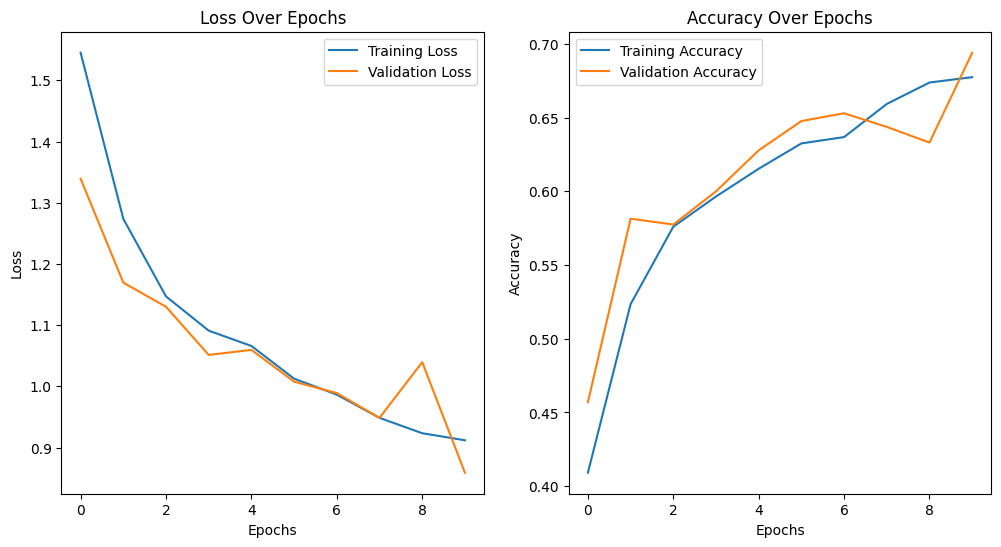

In [ ]:

plot_learning_curves(history_complex)

Classe réelle : city
Image sélectionnée : 9124097373_eb699e55d8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


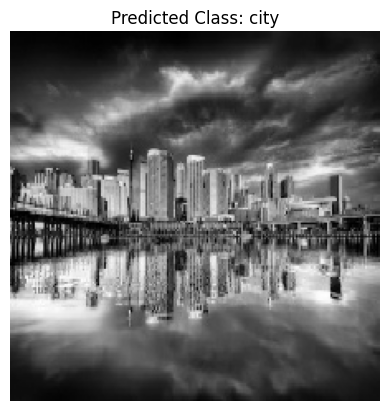

--------------------------------------------------
Classe réelle : city
Image sélectionnée : 5016399019_970102963c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


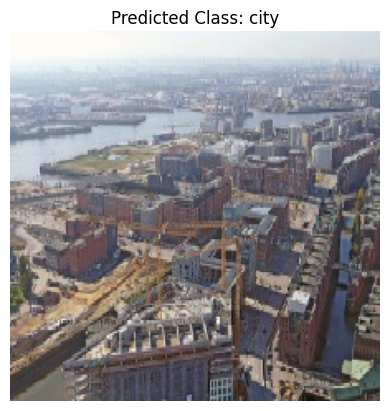

--------------------------------------------------
Classe réelle : field
Image sélectionnée : 15914102353_a90a723946.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


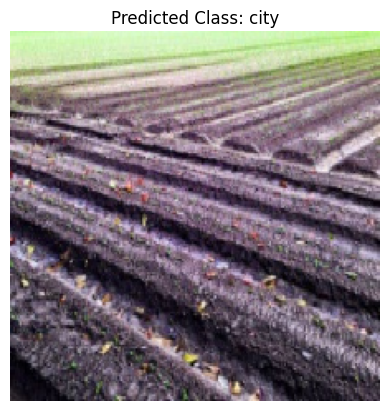

--------------------------------------------------
Classe réelle : city
Image sélectionnée : 4905639853_37a883f49b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


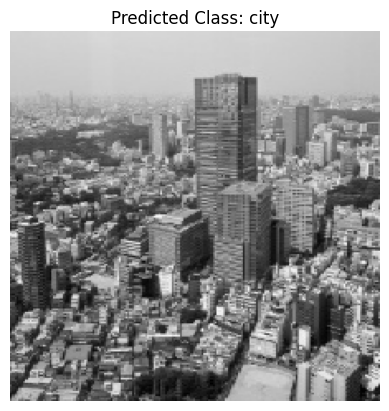

--------------------------------------------------
Classe réelle : forest
Image sélectionnée : 26911612921_bb966732cf.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


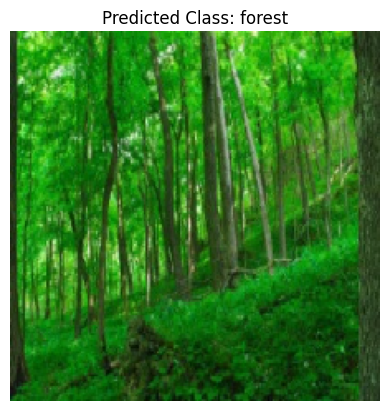

--------------------------------------------------


In [ ]:
predict_n_random_images('landscapes', complex_model, class_names, n=5)

#4. Utiliser un réseau pré-entraîné pour améliorer vos performances

Il s'agit d'un modèle VGG16, voici son architecture:
![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [ ]:
from tensorflow.keras.applications import VGG16 # on prend le reseaux VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(224, 224),   # Résolution réduite pour que l'algo tourne plus vite
    batch_size=32,            # Augmentation de la taille des batchs
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)


batch_size = 32  # Taille des lots augmentée

def extract_features(generator, sample_count, target_size=(224, 224)):
    # Déterminer la taille des caractéristiques en fonction du modèle utilisé
    features_shape = (sample_count, target_size[0] // 32, target_size[1] // 32, 512)
    features = np.zeros(shape=features_shape)
    labels = np.zeros(shape=(sample_count))  # Tableau unidimensionnel pour les étiquettes scalaires
    i = 0
    for inputs_batch, labels_batch in generator:
        # Prédire les caractéristiques avec un modèle pré-entraîné
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        # Convertir les étiquettes en indices scalaires
        labels[i * batch_size : (i + 1) * batch_size] = np.argmax(labels_batch, axis=1)
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


# Extraction des caractéristiques
train_features, train_labels = extract_features(train_generator, train_generator.samples)
test_features, test_labels = extract_features(validation_generator, validation_generator.samples)



Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━

In [ ]:
print(train_features.shape)  # On affiche la forme de train_features pour voir la forme de nos données
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)



(3026, 7, 7, 512)
(3026,)
(755, 7, 7, 512)
(755,)


In [ ]:
num_classes = 7

# Convertir les étiquettes en one-hot
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Vérifier la forme des étiquettes
print(f"Forme de train_labels : {train_labels.shape}")
print(f"Forme de test_labels : {test_labels.shape}")

Forme de train_labels : (3026, 7)
Forme de test_labels : (755, 7)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3766 - loss: 1.6541 - val_accuracy: 0.8106 - val_loss: 0.8410
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.8530 - val_accuracy: 0.8596 - val_loss: 0.5937
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8066 - loss: 0.6287 - val_accuracy: 0.8675 - val_loss: 0.4716
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.5067 - val_accuracy: 0.8821 - val_loss: 0.4293
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8683 - loss: 0.4643 - val_accuracy: 0.8914 - val_loss: 0.4071
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - loss: 0.4124 - val_accuracy: 0.8914 - val_loss: 0.3626
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8821 - loss: 0.3689 - val_accuracy: 0.8821 - val_loss: 0.3590
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9069 - loss: 0.3173 - val_accuracy: 0.9020 - val_loss

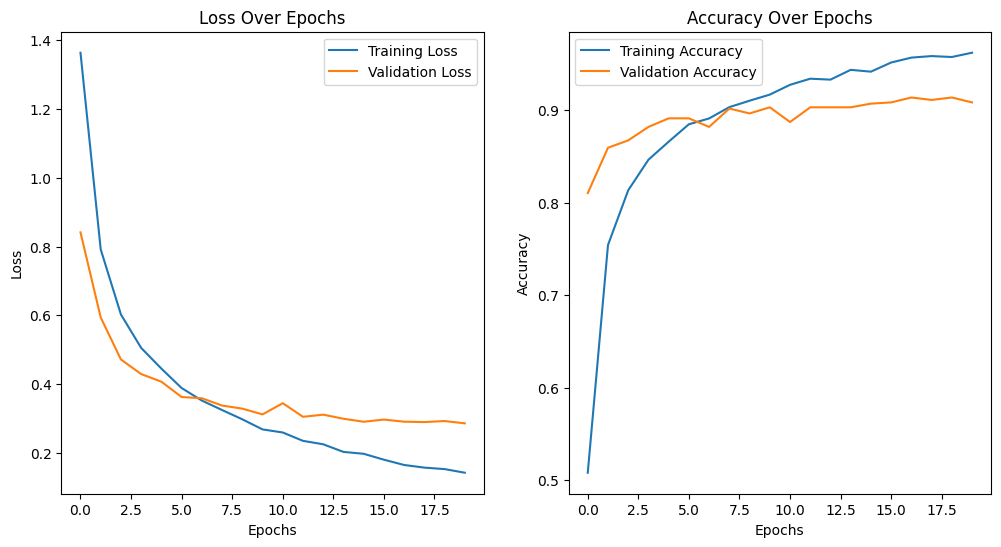

In [ ]:

# Créer le modèle
model_VG = Sequential()
model_VG.add(Dense(256, activation='relu', input_dim=7*7*512))  # Couche cachée avec 256 neurones
model_VG.add(Dropout(0.5))  # Ajout de Dropout pour éviter l'overfitting
model_VG.add(Dense(num_classes, activation='softmax'))  # Couche de sortie avec activation softmax

# Compiler le modèle
model_VG.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history_VG = model_VG.fit(train_features.reshape(3026, 7*7*512), train_labels,   # 3026 = train_features.shape[0] (3026 exemples, chaque exemple ayant une forme de (7, 7, 512))
                    epochs=20,
                    batch_size=32,
                    validation_data=(test_features.reshape(755, 7*7*512), test_labels))

# Afficher les courbes d'apprentissage
plot_learning_curves(history_VG)

# 5.Comparer les résultats produits par 2. 3. et 4. dans un tableau récapitulatif (utilisez le jeu de validation).

In [ ]:
from tensorflow.keras.utils import to_categorical
# Extraire les caractéristiques des données de validation
val_features, val_labels = extract_features(validation_generator, validation_generator.samples)

# Encoder les étiquettes en one-hot
val_labels = to_categorical(val_labels, num_classes=num_classes)

# Reshape des caractéristiques
val_features = val_features.reshape(validation_generator.samples, 7*7*512)

# Évaluer le modèle `model_VG`
loss_VG, accuracy_VG = model_VG.evaluate(val_features, val_labels)

print(f"Loss: {loss_VG}, Accuracy: {accuracy_VG}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9078 - loss: 0.2878
Loss: 0.2860496

In [ ]:
# On prend les même données de test (la data-augmentation ... c'est que pour l'entrainement, une fois que les poids/biais optimisés sont fixés on utilise les data qu'on veut )

loss_complex, accuracy_complex = complex_model.evaluate(validation_generator) # Modèle complexe
loss_VG, accuracy_VG = model_VG.evaluate(val_features, val_labels) # modèle avec VGG16
loss_1 , accuracy_1 = model.evaluate(validation_generator) # modèle simple
parameters_complex = model.count_params()  # complex_model.count_params()
parameters_VG = model.count_params()     # model_VG.count_params()
parameters_1 = model.count_params().  # model.count_params()


# Création d'un dictionnaire pour structurer les données
data = {
    "Modèle": ["Modèle simple", "Modèle avec VGG16", "Modèle complexe"],
    "Perte (Loss)": [loss_1, loss_VG, loss_complex],
    "Précision (Accuracy)": [accuracy_1, accuracy_VG, accuracy_complex],
    "Nombre de paramètres": [parameters_1, parameters_VG, parameters_complex]
}

# Création d'un DataFrame avec pandas
df = pd.DataFrame(data)

# Affichage du tableau
print(df)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7257 - loss: 0.7832
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9078 - loss: 0.2878 
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5977 - loss: 1.1548
              Modèle  Perte (Loss)  Précision (Accuracy)  Nombre de paramètres
0      Modèle simple      1.198939              0.589404               6309063
1  Modèle avec VGG16      0.286050              0.908609               6309063
2    Modèle complexe      0.753245              0.732450               6309063


**Résultats du Tableau :**  
| Modèle              | Perte (Loss) | Précision (%) | Paramètres      |  
|---------------------|--------------|---------------|-----------------|  
| Modèle simple       | 1.20         | 58.9          | 6M             |  
| VGG16               | 0.29         | 90.8          | 6.4M           |  
| Modèle complexe     | 0.75         | 73.2          | 102M           |  

**Interprétation :**  
- Le modèle **VGG16** est le meilleur compromis entre précision et complexité.  
- Le **modèle simple** est rapide mais moins performant.  
- Le modèle complexe a beaucoup plus de paramètres donc pour éviter tout risque potentiel de surapprentissage, il pourrait être utile de tester une régularisation supplémentaire (comme un dropout).  

---

**Conclusion des résultats**  
- Les résultats montrent que l’utilisation d’un **modèle pré-entraîné** comme **VGG16** améliore significativement les performances.  

# 6. Afficher quelques exemples sur lesquels votre réseau se trompe et afficher ses prédictions

In [ ]:
print(val_features.shape, val_labels.shape)

(755, 25088) (755, 7)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


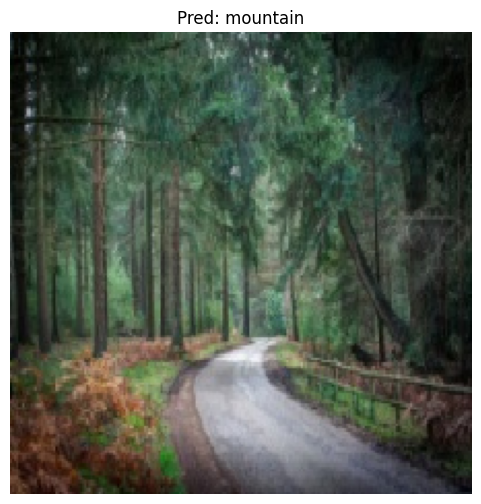

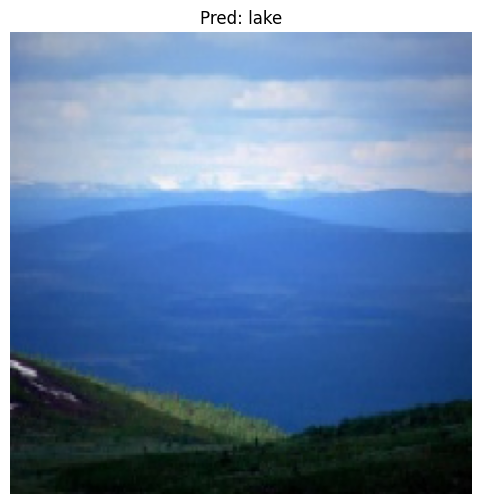

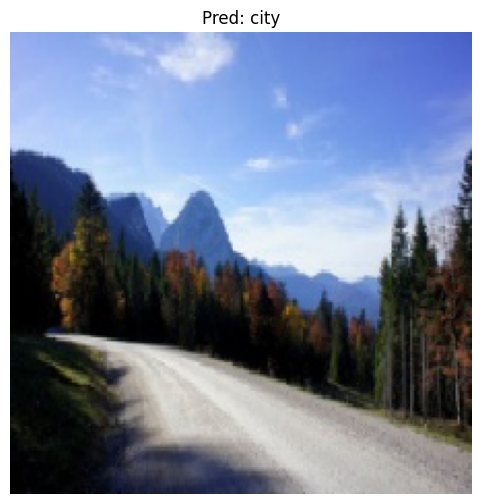

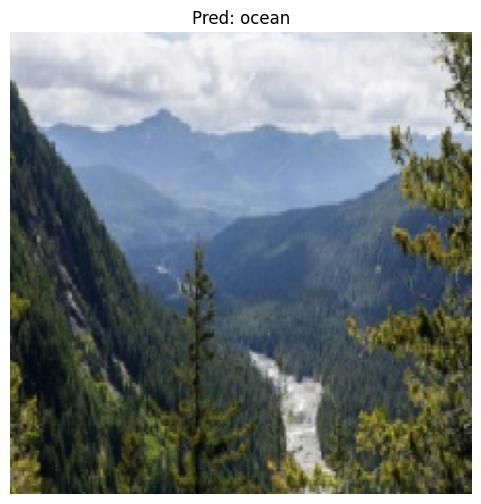

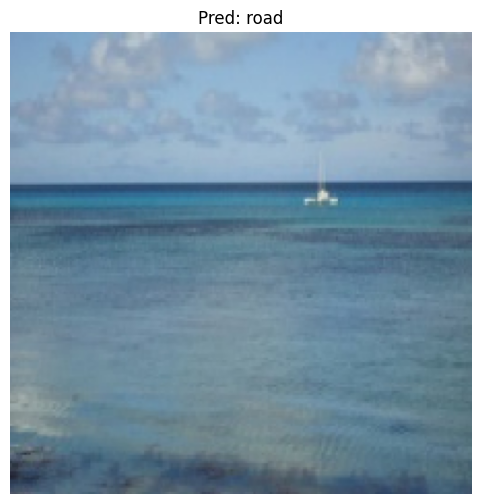

In [ ]:
def display_wrong_predictions(model, X, y_true, class_names, original_images, n=5):
    # Effectuer les prédictions
    y_pred = model.predict(X)
    predicted_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)

    # Trouver les indices où les prédictions sont incorrectes
    incorrect_indices = np.where(predicted_classes != true_classes)[0]

    # Afficher quelques exemples de mauvaises prédictions
    for i in range(min(n, len(incorrect_indices))):
        idx = incorrect_indices[i]

        # Afficher l'image d'origine
        plt.figure(figsize=(6, 6))
        plt.imshow(original_images[idx])  # Afficher l'image originale avant la transformation
        plt.title(f"Pred: {class_names[predicted_classes[idx]]}")
        plt.axis('off')
        plt.show()


# Récupérer les images originales du jeu de validation
X_val, y_val = next(validation_generator)  # Prendre un lot d'images et de labels
X_val = []
y_val = []

# Extraire toutes les images et leurs labels
for inputs_batch, labels_batch in validation_generator:
    X_val.append(inputs_batch)
    y_val.append(labels_batch)
    if len(X_val) * batch_size >= validation_generator.samples:
        break

# Convertir en arrays numpy
X_val = np.concatenate(X_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

# Exemple d'utilisation avec les images d'entraînement et leurs labels
display_wrong_predictions(model_VG, val_features, val_labels, class_names, X_val)  # X_val devrait être les images d'origine


7. Visualiser vos projections dans l’espaces des features à l’aide d’une t-SNE
sur un sous ensemble du dataset (quelques centaines d’images).

Found 3781 images belonging to 7 classes.


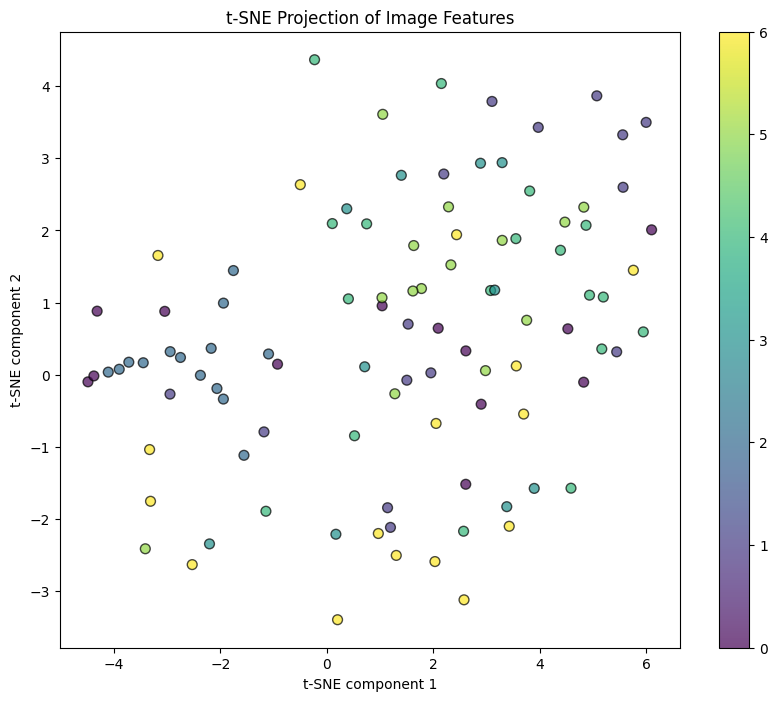

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Chemin vers le répertoire contenant les images
input_dir = 'landscapes'

# Préparer le générateur pour un sous-ensemble de 100 images
datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(224, 224),  # Redimensionner les images à 224x224
    batch_size=100,          # Prendre un sous-ensemble de 100 images
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Extraire les images du générateur
images, labels = next(train_generator)

# Appliquer PCA pour réduire la dimension à 50
pca = PCA(n_components=50)
X_pca = pca.fit_transform(images.reshape(images.shape[0], -1))  # Applatir les images

# Appliquer t-SNE sur les données PCA réduites
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Visualiser la projection t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.argmax(labels, axis=1), cmap='viridis', s=50, edgecolor='k', alpha=0.7)
plt.colorbar()
plt.title('t-SNE Projection of Image Features')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()


# 8. A l’aide des features calculées par votre réseau, choisir une image au hasard dans le dataset et afficher les 3 images qui sont les plus proches au sens de la distance euclidienne. Vous pourrez, si vous le souhaitez, utiliser les plus proches voisins de Scikit-Learn

Found 3781 images belonging to 7 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step


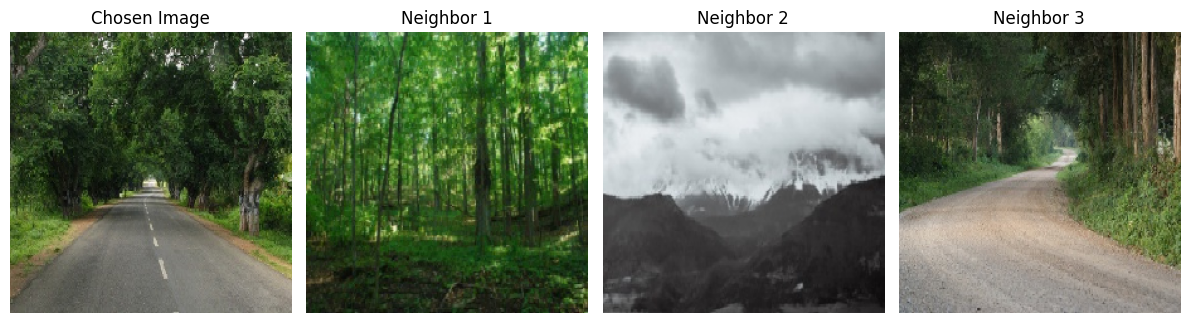

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# Préparer le générateur
input_dir = 'landscapes'
datagen = ImageDataGenerator(rescale=1/255.0)
train_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(224, 224),  # Redimensionner les images à 224x224
    batch_size=100,          # Prendre un sous-ensemble de 100 images
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Extraire les features des 100 images
images, labels = next(train_generator)

# Utiliser le modèle VGG16 pour obtenir les features
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
features = conv_base.predict(images)

# Applatir les features pour les rendre utilisables dans k-NN
flat_features = features.reshape(features.shape[0], -1)

# Appliquer k-NN pour trouver les 3 images les plus proches
knn = NearestNeighbors(n_neighbors=4, metric='euclidean')  # 4 pour inclure l'image elle-même
knn.fit(flat_features)

# Sélectionner une image au hasard
random_idx = random.randint(0, len(flat_features) - 1)

# Trouver les 3 voisins les plus proches
distances, indices = knn.kneighbors([flat_features[random_idx]])

# Afficher l'image choisie et ses 3 voisins les plus proches
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices[0][1:]):  # Ignorer l'image elle-même (indice 0)
    plt.subplot(1, 4, i + 2)
    plt.imshow(images[idx])
    plt.title(f'Neighbor {i + 1}')
    plt.axis('off')

# Afficher l'image choisie
plt.subplot(1, 4, 1)
plt.imshow(images[random_idx])
plt.title('Chosen Image')
plt.axis('off')

plt.tight_layout()
plt.show()
